# Monitoring IoT Sensors (Temperature & Humidity)
# With SQLite3 In Real Time

<img src="https://github.com/leehaesung/NodeRED/raw/master/02_CodeFiles/10_ESP8266-01/01_Images/ESP8266_DHT11.jpg" height="400" width="450" >

* How to install Paho-MQTT :
```
sudo pip install paho-mqtt
```

## CREATE TABLE

* SQLite <b>CREATE TABLE</b> statement is used to <b>create</b> a new table in any of the given database. Creating a basic table involves naming the table and defining its columns and each column's data type.

In [1]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
conn.execute('''CREATE TABLE HOME
         (LOCAL INT PRIMARY KEY     NOT NULL,
         TEMP           INT    NOT NULL,
         HUM            INT     NOT NULL);''')
print "Table created successfully";

conn.close()

Table created successfully


## INSERT QUERY FOR UNIT TESTING

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [6]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";

conn.execute("INSERT INTO HOME (LOCAL,TEMP,HUM) \
      VALUES (20171201221142, 24, 43 )");

conn.commit()
print "Records created successfully";
conn.close()

Opened database successfully
Records created successfully


## SEARCH THE SPECIFIC TEMPERATURE DATA

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [2]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";

cursor = conn.execute("SELECT * from HOME WHERE TEMP = 25")
for row in cursor:
   print "Local Time   = ", row[0]
   print "Temperature  = ", row[1]
   print "Humidity = ", row[2], "\n"
   

print "Operation done successfully";
conn.close()

Opened database successfully
Local Time   =  20171201215000
Temperature  =  25
Humidity =  41 

Operation done successfully


In [3]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully"
print ""
print("   Local Time |T(°C)|H(%)")
print("===========================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP = 25")
for row in cursor:
    print(row[0],row[1],row[2])
    
conn.close()

Opened database successfully

   Local Time |T(°C)|H(%)
(20171201215000, 25, 41)


#### Searching Temperature Data

In [4]:
import sqlite3

def search_temperature(temp):
    conn = sqlite3.connect('sqliteIotEspDht')

    str1 = "SELECT * FROM HOME WHERE TEMP = "
    str2 = str(temp)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print "Opened database successfully"
    print ""
    print("   Local Time |T(°C)|H(%)")
    print("===========================")
    
    for row in cursor:
        print(row[0],row[1],row[2])

In [5]:
# Put any temperature.
search_temperature(25)

Opened database successfully

   Local Time |T(°C)|H(%)
(20171201215000, 25, 41)


#### Searching Humidity Data

In [9]:
import sqlite3

def search_humidity(hum):
    conn = sqlite3.connect('sqliteIotEspDht')

    str1 = "SELECT * FROM HOME WHERE HUM = "
    str2 = str(hum)
    str3 = ";"
    sql = str1 + str2 + str3
    cursor = conn.execute(sql)

    print "Opened database successfully"
    print ""
    print("   Local Time |T(°C)|H(%)")
    print("===========================")
    
    for row in cursor:
        print(row[0],row[1],row[2])

In [10]:
# Put any humidity data.
search_humidity(43)

Opened database successfully

   Local Time |T(°C)|H(%)
(20171201221135, 24, 43)
(20171201221141, 24, 43)
(20171201221203, 23, 43)
(20171201221211, 23, 43)
(20171201221242, 23, 43)
(20171201221257, 23, 43)
(20171201221305, 23, 43)
(20171201221340, 23, 43)
(20171201221348, 23, 43)
(20171201221356, 23, 43)
(20171201232749, 24, 43)
(20171201232809, 24, 43)
(20171201233015, 24, 43)
(20171201233053, 24, 43)
(20171201233109, 22, 43)
(20171201233147, 22, 43)
(20171201233155, 22, 43)
(20171201233202, 24, 43)


## Eclipse Paho™ MQTT Python Pub/Sub Client

In [7]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

topics = ['EspTempHumSensor']

m = subscribe.simple(topics, hostname="iot.eclipse.org", retained=False, msg_count=2)
for a in m:
    print(a.topic)
    print(a.payload)

EspTempHumSensor
{"data":{"local":20171201215854,"temp":25,"hum":42}}
EspTempHumSensor
{"data":{"local":20171201215858,"temp":24,"hum":31}}


In [ ]:
import sys
try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    print("%s : %s" % (message.topic, message.payload))
    buf = message.payload
    
subscribe.callback(print_msg, "EspTempHumSensor", hostname="iot.eclipse.org")

EspTempHumSensor : {"data":{"local":20171201215917,"temp":27,"hum":40}}
EspTempHumSensor : {"data":{"local":20171201215921,"temp":24,"hum":31}}
EspTempHumSensor : {"data":{"local":20171201215925,"temp":25,"hum":41}}
EspTempHumSensor : {"data":{"local":20171201215930,"temp":25,"hum":41}}
EspTempHumSensor : {"data":{"local":20171201215934,"temp":24,"hum":31}}
EspTempHumSensor : {"data":{"local":20171201215937,"temp":24,"hum":31}}
EspTempHumSensor : {"data":{"local":20171201215941,"temp":24,"hum":31}}
EspTempHumSensor : {"data":{"local":20171201215945,"temp":25,"hum":42}}
EspTempHumSensor : {"data":{"local":20171201215948,"temp":25,"hum":41}}
EspTempHumSensor : {"data":{"local":20171201215952,"temp":24,"hum":31}}


##  INSERT QUERY (IN REAL TIME)

* SQLite <b>INSERT INTO</b> Statement is used to <b>add</b> new rows of data into a table in the database.

In [ ]:
import sys 
import sqlite3
import locale

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";
print ""
print "INSERT OPERATION"
print("   Local Time     |T(°C)|H(%)")
print("================================")

try:
    import paho.mqtt.subscribe as subscribe
except ImportError:
    # This part is only required to run the example from within the examples
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import paho.mqtt.subscribe"
    import os
    import inspect
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"../src")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    import paho.mqtt.subscribe as subscribe
    import paho.mqtt.client

def print_msg(client, userdata, message):
    #print("%s : %s" % (message.topic, message.payload))
    data = message.payload
    
    # {"data":{"local":20171201215917,"temp":27,"hum":40}} 
    local = str(data[17:-21])
    temp = str(data[39:-11])
    hum = str(data[48:-2])        
    
    print(local, temp, hum)
    
    str1 = "INSERT INTO HOME (LOCAL,TEMP,HUM) \
      VALUES ("
    str2 = local 
    str3 = ", "
    str4 = temp
    str5 = ", "
    str6 = hum
    str7 = " )"
    insert = str1 + str2 + str3 + str4 + str5 + str6 + str7
    conn.execute(insert)
    conn.commit()

subscribe.callback(print_msg, "EspTempHumSensor", hostname="iot.eclipse.org")

Opened database successfully

INSERT OPERATION
   Local Time     |T(°C)|H(%)
('20171201233015', '24', '43')
('20171201233018', '24', '31')
('20171201233023', '27', '40')
('20171201233027', '24', '31')
('20171201233030', '24', '31')
('20171201233035', '24', '41')
('20171201233038', '24', '42')
('20171201233043', '24', '42')
('20171201233046', '24', '42')
('20171201233050', '23', '31')
('20171201233053', '24', '43')
('20171201233057', '24', '31')
('20171201233101', '24', '42')
('20171201233105', '24', '31')
('20171201233109', '22', '43')
('20171201233112', '24', '31')
('20171201233116', '24', '42')
('20171201233120', '24', '31')
('20171201233123', '24', '31')
('20171201233128', '24', '42')
('20171201233131', '24', '31')
('20171201233136', '24', '42')
('20171201233140', '24', '31')
('20171201233143', '24', '31')
('20171201233147', '22', '43')
('20171201233151', '24', '31')
('20171201233155', '22', '43')
('20171201233158', '24', '31')
('20171201233202', '24', '43')
('20171201233207', '24',

## SELECT QUERY

* SQLite <b>SELECT</b> statement is used to <b>fetch</b> the data from a SQLite database table which returns data in the form of a result table. These result tables are also called result sets.

In [2]:
#!/usr/bin/python

import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully"
print ""
print("   Local Time |T(°C)|H(%)")
print("===========================")
cursor = conn.execute("SELECT * from HOME WHERE TEMP")
for row in cursor:
    print(row[0],row[1],row[2])
    
conn.close()

Opened database successfully

   Local Time |T(°C)|H(%)
(20171201215000, 25, 41)
(20171201221130, 23, 31)
(20171201221135, 24, 43)
(20171201221138, 23, 31)
(20171201221141, 24, 43)
(20171201221145, 23, 31)
(20171201221149, 23, 42)
(20171201221152, 23, 31)
(20171201221157, 23, 31)
(20171201221200, 23, 31)
(20171201221203, 23, 43)
(20171201221207, 23, 31)
(20171201221211, 23, 43)
(20171201221214, 23, 31)
(20171201221218, 24, 42)
(20171201221223, 23, 31)
(20171201221227, 23, 42)
(20171201221230, 23, 31)
(20171201221234, 23, 31)
(20171201221237, 23, 31)
(20171201221242, 23, 43)
(20171201221245, 23, 31)
(20171201221249, 23, 37)
(20171201221253, 23, 31)
(20171201221257, 23, 43)
(20171201221301, 23, 31)
(20171201221305, 23, 43)
(20171201221308, 23, 31)
(20171201221312, 23, 42)
(20171201221316, 23, 31)
(20171201221319, 23, 31)
(20171201221323, 23, 42)
(20171201221327, 23, 31)
(20171201221331, 23, 42)
(20171201221336, 23, 31)
(20171201221340, 23, 43)
(20171201221343, 23, 31)
(20171201221348, 23

## DELETE QUERY

* SQLite <b>DELETE QUERY</b> is used to <b>delete</b> the existing records from a table. You can use WHERE clause with <b>DELETE QUERY</b> to <b>delete</b> the selected rows, otherwise all the records would be deleted.

In [3]:
import sqlite3

conn = sqlite3.connect('sqliteIotEspDht')
print "Opened database successfully";

conn.execute("DELETE from HOME where LOCAL = 20171201233225;")
conn.commit()
print "Total number of rows deleted :", conn.total_changes

print ""
print("   Local Time |T(°C)|H(%)")
print("===========================")
cursor = conn.execute("SELECT * from HOME")
for row in cursor:
    print(row[0],row[1],row[2])

print "DELETE Operation done successfully";
conn.close()

Opened database successfully
Total number of rows deleted : 1

   Local Time |T(°C)|H(%)
(20171201215000, 25, 41)
(20171201221130, 23, 31)
(20171201221135, 24, 43)
(20171201221138, 23, 31)
(20171201221141, 24, 43)
(20171201221145, 23, 31)
(20171201221149, 23, 42)
(20171201221152, 23, 31)
(20171201221157, 23, 31)
(20171201221200, 23, 31)
(20171201221203, 23, 43)
(20171201221207, 23, 31)
(20171201221211, 23, 43)
(20171201221214, 23, 31)
(20171201221218, 24, 42)
(20171201221223, 23, 31)
(20171201221227, 23, 42)
(20171201221230, 23, 31)
(20171201221234, 23, 31)
(20171201221237, 23, 31)
(20171201221242, 23, 43)
(20171201221245, 23, 31)
(20171201221249, 23, 37)
(20171201221253, 23, 31)
(20171201221257, 23, 43)
(20171201221301, 23, 31)
(20171201221305, 23, 43)
(20171201221308, 23, 31)
(20171201221312, 23, 42)
(20171201221316, 23, 31)
(20171201221319, 23, 31)
(20171201221323, 23, 42)
(20171201221327, 23, 31)
(20171201221331, 23, 42)
(20171201221336, 23, 31)
(20171201221340, 23, 43)
(2017120122

## DROP TABLE

* SQLite <b>DROP TABLE</b> statement is used to <b>remove</b> a table definition and all associated data, indexes, triggers, constraints, and permission specifications for that table.

In [1]:
import sqlite3
conn = sqlite3.connect('sqliteIoTempSensor')
cur = conn.cursor()
sql = "DROP TABLE HOME;"
cur.execute(sql)
print "Deleted the table successfully"
conn.commit()
conn.close()

Deleted the table successfully


# TensorFlow Analytics

* Linear Regression
     ```
     Linear Regression Model = W * x + b
     ```

#### Analyzing Temperature Data

In [1]:
# From https://www.tensorflow.org/get_started/get_started
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4, 5]
y_train = [25, 23, 24, 23, 24]

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.19998577] b: [ 24.39994812] loss: 2.4


#### Analyzing Humidity Data

In [17]:
# From https://www.tensorflow.org/get_started/get_started
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [1, 2, 3, 4, 5]
y_train = [25, 23, 24, 23, 24]

# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.19998577] b: [ 24.39994812] loss: 2.4


### Plotting Graph

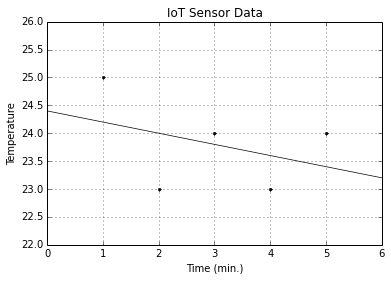

In [16]:
# "np" and "plt" are common aliases for NumPy and Matplotlib, respectively.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# x_train represents the features of our training data, the diameters of the pizzas.
# A scikit-learn convention is to name the matrix of feature vectors X. 
# Uppercase letters indicate matrices, and lowercase letters indicate vectors.
x_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# y is a vector representing the prices of the pizzas.
y_train = [25, 23, 24, 23, 24]

plt.figure()
plt.title('IoT Sensor Data')
plt.xlabel('Time (min.)')
plt.ylabel('Temperature')
plt.plot(x_train, y_train, 'k.')
plt.axis([0, 6, 22, 26])
plt.grid(True)

# W: [-0.19998577] b: [ 24.39994812] loss: 2.4  loss means cost function
# y = W.x + b (or) y = a.x + b  
# y = -0.19998577 x + 24.39994812
# If x = 0, y = 24.39994812
# If y = 0, -0.199985773 x = 24.39994812, 
#           x = -(24.39994812/0.19998577) = - 122.008421499

plt.plot([0, 122.008421499], [24.39994812, 0], color='k', linestyle='-', linewidth=0.7)
plt.show()

### Predict next temperature after 10 mins, 20 mins, 30 mins, and 40 mins.

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

x_train = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y_train = [25, 23, 24, 23, 24]

# Create an instance of the estimator, LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(x_train, y_train)
# Predict the data of a temperature with a trend that has never been seen before
test_temp = np.array([[6]])
predicted_temp = model.predict(test_temp)[0]
print('After 10 minutes, it would be: %.2f °C .' % predicted_temp)

test_temp = np.array([[7]])
predicted_temp = model.predict(test_temp)[0]
print('After 20 minutes, it would be: %.2f °C .' % predicted_temp)

test_temp = np.array([[8]])
predicted_temp = model.predict(test_temp)[0]
print('After 30 minutes, it would be: %.2f °C .' % predicted_temp)

test_temp = np.array([[9]])
predicted_temp = model.predict(test_temp)[0]
print('After 40 minutes, it would be: %.2f °C .' % predicted_temp)

After 10 minutes, it would be: 23.20 °C .
After 20 minutes, it would be: 23.00 °C .
After 30 minutes, it would be: 22.80 °C .
After 40 minutes, it would be: 22.60 °C .


In [2]:
# Functions to show the Graphs

import numpy as np
from IPython.display import clear_output, Image, display, HTML


def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [3]:
show_graph(tf.get_default_graph())

## References

* SQLite Tutorial: https://www.tutorialspoint.com/sqlite/
* SQLite Quick Guide: https://www.tutorialspoint.com/sqlite/sqlite_quick_guide.htm
* SQLite - Python Tuotorial: https://www.tutorialspoint.com/sqlite/sqlite_python.htm
* SQLite - Python Quick Guide: https://github.com/leehaesung/SQLite-Python_Quick_Guide